# TODO:
- Set common scale on axis that could be missleading

# README

# Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data

In [3]:
file_path = 'Data\struct3.csv'
data = pd.read_csv(file_path)

## Separate 'dbpedia' and 'wikidata' datasets

In [4]:
dbpedia_data = data[data['File'].str.contains('dbpedia')].drop(columns= ['Unnamed: 0'])
wiki_data = data[data['File'].str.contains('wiki')].drop(columns= ['Unnamed: 0'])

# Function for plotting

In [12]:
legend_mapping = {
                    'KD': 'Knowledge Degree', 'VocUni': 'Vocabulary Uniqueness', 
                    'Vdyn': 'Vocabulary Dynamicity', 'AddVdyn': 'Addition Vdyn', 
                    'RemVdyn': 'Removal Vdyn', 'ChangeRatio': 'Change Ratio', 
                    'AddCR': 'Addition Change Ratio', 
                    'RemCR': 'Removal Change Ratio', 'Growth': 'Growth'
                }

def plot_parameters_over_versions(df, parameters, markers, title, output_file_name, 
                                    legend_mapping= legend_mapping, 
                                    x_label='Ratio', save_image= False,
                                    show_plot= False):
    for parameter, marker in zip(parameters, markers):
        legend_name = legend_mapping[parameter] if legend_mapping is not None else parameter
        plt.plot(df['Version'], df[parameter], marker=marker, linestyle='-', label=legend_name)

    plt.xlabel('Version')
    plt.ylabel(x_label)
    plt.title(title)
    plt.legend()
    plt.grid(axis='both', color='0.85')
    plt.xticks(np.arange(0, len(df[parameter])+1, 1))
    if save_image: plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    if show_plot: plt.show()

# Introductory data description

## Top K most common

# Structural measures of evolution

## Growth ratio

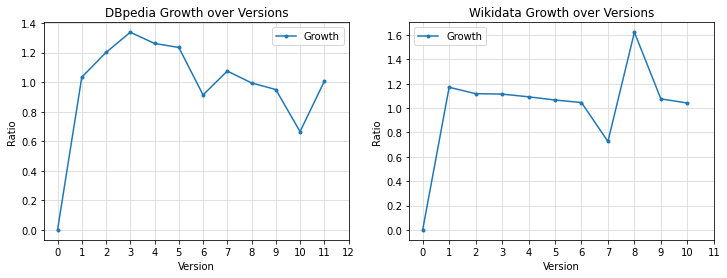

In [24]:
plt.rcParams["figure.figsize"] = [12, 4]
plt.subplot(1,2,1)
plot_parameters_over_versions(dbpedia_data, ['Growth'], ['.'],"DBpedia Growth over Versions", 'dbpedia_Growth.png', legend_mapping=legend_mapping)
plt.subplot(1,2,2)
plot_parameters_over_versions(wiki_data, ['Growth'], ['.'],"Wikidata Growth over Versions", 'wiki_Growth.png', legend_mapping=legend_mapping)
plt.show()

# Measuring evolution of content

## Knowledge degree

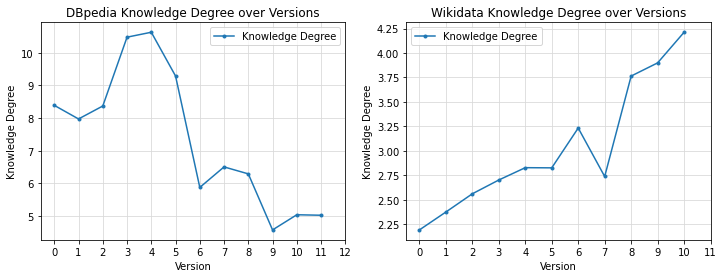

In [25]:
plt.rcParams["figure.figsize"] = [12, 4]
plt.subplot(1,2,1)
plot_parameters_over_versions(dbpedia_data, ['KD'], ['.'], "DBpedia Knowledge Degree over Versions", 'dbpedia_KD.png', legend_mapping=legend_mapping, x_label='Knowledge Degree')
plt.subplot(1,2,2)
plot_parameters_over_versions(wiki_data, ['KD'], ['.'], "Wikidata Knowledge Degree over Versions", 'wiki_KD.png', legend_mapping=legend_mapping, x_label='Knowledge Degree')
plt.show()

## Change ratio

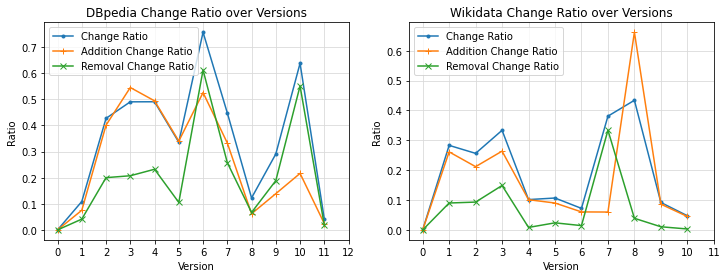

In [26]:
plt.rcParams["figure.figsize"] = [12, 4]
plt.subplot(1,2,1)
plot_parameters_over_versions(dbpedia_data, ['ChangeRatio', 'AddCR', 'RemCR'], ['.', '+', 'x'], "DBpedia Change Ratio over Versions", 'dbpedia_ChangeRatio.png', legend_mapping=legend_mapping)
plt.subplot(1,2,2)
plot_parameters_over_versions(wiki_data, ['ChangeRatio', 'AddCR', 'RemCR'], ['.', '+', 'x'],"Wikidata Change Ratio over Versions", 'wiki_ChangeRatio.png', legend_mapping=legend_mapping)
plt.show()

## Vocabulary

### Vocabulary uniqueness

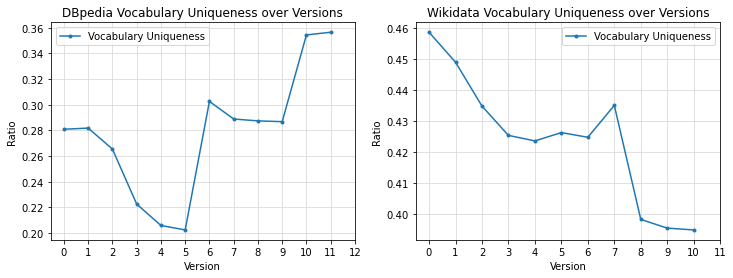

In [27]:
plt.rcParams["figure.figsize"] = [12, 4]
plt.subplot(1,2,1)
plot_parameters_over_versions(dbpedia_data, ['VocUni'], ['.'], "DBpedia Vocabulary Uniqueness over Versions", 'dbpedia_VocUni.png', legend_mapping=legend_mapping)
plt.subplot(1,2,2)
plot_parameters_over_versions(wiki_data, ['VocUni'], ['.'], "Wikidata Vocabulary Uniqueness over Versions", 'wiki_VocUni.png')
plt.show()

### Vocabulary dynamicity

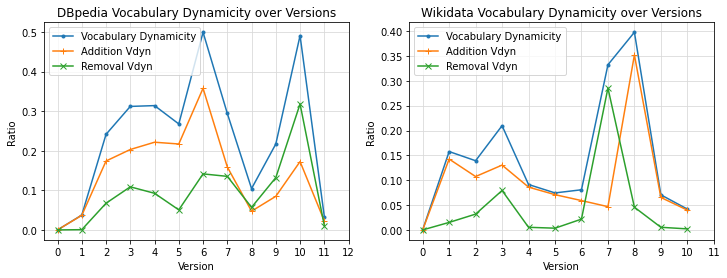

In [28]:
plt.rcParams["figure.figsize"] = [12, 4]
plt.subplot(1,2,1)
plot_parameters_over_versions(dbpedia_data, ['Vdyn', 'AddVdyn', 'RemVdyn'], ['.', '+', 'x'], "DBpedia Vocabulary Dynamicity over Versions", 'dbpedia_Vdyn.png', legend_mapping=legend_mapping)
plt.subplot(1,2,2)
plot_parameters_over_versions(wiki_data, ['Vdyn', 'AddVdyn', 'RemVdyn'], ['.', '+', 'x'],"Wikidata Vocabulary Dynamicity over Versions", 'wiki_Vdyn.png', legend_mapping=legend_mapping)
plt.show()

# Measuring quality between versions

## Instantiated class ratio

## Instantiated property ratio

## Inverse multiple inheritance number